# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import numpy as np
import nltk
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from dotenv import load_dotenv
nltk.download("stopwords")

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ihate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
C:\Users\ihate\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = '6c13503249e24baca887b9ff200187db')


In [4]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")
print(f"Total articles about Bitcoin: {bitcoin['totalResults']}")

Total articles about Bitcoin: 3707


In [5]:
# Fetch the Ethereum news articles
Ethereum = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
print(f"Total articles about Bitcoin: {Ethereum['totalResults']}")

Total articles about Bitcoin: 1398


In [6]:
bitcoin["articles"][0]



{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Crypto Traders Cut Out the Middleman, Simply Rob Victim',
 'description': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customer’s 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came in to do the trade.Read more...',
 'url': 'https://gizmodo.com/crypto-traders-cut-out-the-middleman-simply-rob-victim-1845011301',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/li0fkkejdmaugm8v1fkw.jpg',
 'publishedAt': '2020-09-10T14:28:00Z',
 'content': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]'}

In [7]:
# Sentiment calculation based on compound score
def get_sentiment(score):
   
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments=[]
for x in bitcoin["articles"]:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append(
            {
            "Date": date,
            "Text": text,
            "Compound Score": compound,
            "Positive Score": pos,
            "Negative Score": neg,
            "Neutral Score": neu
            
        }
        )

    except AttributeError:
        pass
# Attaching sentiment columns to the News DataFrame
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_sentiment_df.head()

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Text
0,-0.6908,2020-09-10,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...
1,0.0000,2020-09-08,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
2,0.2732,2020-08-23,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...
3,0.0000,2020-09-08,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."
4,0.0000,2020-09-08,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."


In [9]:
Ethereum["articles"][0]


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

In [10]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments=[]
for x in Ethereum["articles"]:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Date": date,
            "Text": text,
            "Compound Score": compound,
            "Positive Score": pos,
            "Negative Score": neg,
            "Neutral Score": neu
            
        })
        
    except AttributeError:
        pass
Ethereum_sentiment_df=pd.DataFrame(ethereum_sentiments)
Ethereum_sentiment_df.head()

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Text
0,0.7506,2020-09-02,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,2020-09-07,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,2020-09-18,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.7579,2020-08-26,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
4,0.0000,2020-08-25,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...


In [12]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,Compound Score,Negative Score,Neutral Score,Positive Score
count,20.000000,20.000000,20.000000,20.000000
mean,0.371550,0.008000,0.915950,0.076050
std,0.320603,0.035777,0.046388,0.046397
min,-0.690800,0.000000,0.802000,0.000000
25%,0.448550,0.000000,0.910000,0.083250
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.910000,0.090000
max,0.750600,0.160000,1.000000,0.198000


In [13]:
# Describe the Ethereum Sentiment
Ethereum_sentiment_df.describe()

,Compound Score,Negative Score,Neutral Score,Positive Score
count,16.000000,16.000000,16.000000,16.000000
mean,0.190694,0.015688,0.921312,0.063062
std,0.298172,0.034763,0.085886,0.070121
min,-0.267700,0.000000,0.747000,0.000000
25%,0.000000,0.000000,0.871000,0.000000
50%,0.000000,0.000000,0.931000,0.053500
75%,0.401900,0.000000,1.000000,0.097250
max,0.757900,0.110000,1.000000,0.209000


### Questions:

Q: Which coin had the highest mean positive score?

A: bitcoin 0.371550

Q: Which coin had the highest compound score?

A: Ethereum 0.757900	

Q. Which coin had the highest positive score?

A: Ethereum 0.209000

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
lemmatizer=WordNetLemmatizer()

In [18]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw=set(stopwords.words("english"))
    regex=re.compile("[^a-zA-Z ]")
    re_clean=regex.sub(' ',text)
    words=word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(x) for x in words]
    tokens=[x.lower() for x in lem if x.lower() not in sw]
    return tokens

In [19]:

bitcoin_sentiment_df["Tokens"]=[tokenizer(x) for x in bitcoin_sentiment_df["Text"]]

In [20]:
# Create a new tokens column for bitcoin
bit_col=["Date","Text","Tokens","Compound Score","Positive Score","Negative Score", "Neutral Score"]

In [21]:
bitcoin_sentiment_df=bitcoin_sentiment_df[bit_col]

In [22]:
bitcoin_sentiment_df.head()

,Date,Text,Tokens,Compound Score,Positive Score,Negative Score,Neutral Score
0,2020-09-10,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa...",-0.6908,0.000,0.16,0.840
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry...",0.0000,0.000,0.00,1.000
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, ha, resulted, mass, shift, w...",0.2732,0.063,0.00,0.937
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagos, london, reuters, four, month, ago, abo...",0.0000,0.000,0.00,1.000
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagos, london, reuters, four, month, ago, abo...",0.0000,0.000,0.00,1.000


In [24]:
Ethereum_sentiment_df["Tokens"]=[tokenizer(x) for x in Ethereum_sentiment_df["Text"]]

In [25]:
# Create a new tokens column for ethereum
eth_col=["Date","Text","Tokens","Compound Score","Positive Score","Negative Score", "Neutral Score"]


In [26]:
Ethereum_sentiment_df= Ethereum_sentiment_df[eth_col]

In [27]:
Ethereum_sentiment_df.head()

,Date,Text,Tokens,Compound Score,Positive Score,Negative Score,Neutral Score
0,2020-09-02,If you've interacted with cryptocurrencies in ...,"[interacted, cryptocurrencies, past, couple, y...",0.7506,0.209,0.0,0.791
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,"[tl, dr, complete, stock, cryptocurrency, inve...",0.0000,0.000,0.0,1.000
2,2020-09-18,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, read, opinions, expressed, en...",0.0000,0.000,0.0,1.000
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ...",0.7579,0.181,0.0,0.819
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklyn, based, technolo...",0.0000,0.000,0.0,1.000


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [28]:
from collections import Counter
from nltk import ngrams

In [ ]:
# Generate the Bitcoin N-grams where N=2
bitcoin_ngrams=[Counter(ngrams(x,n=2)) for x in bitcoin_sentiment_df.Tokens]

In [41]:
print(bitcoin_one_ngrams)

[Counter({('two', 'alleged'): 1, ('alleged', 'crypto'): 1, ('crypto', 'trader'): 1, ('trader', 'singapore'): 1, ('singapore', 'apparently'): 1, ('apparently', 'came'): 1, ('came', 'fool'): 1, ('fool', 'proof'): 1, ('proof', 'plan'): 1, ('plan', 'rather'): 1, ('rather', 'convert'): 1, ('convert', 'customer'): 1, ('customer', 'singapore'): 1, ('singapore', 'dollar'): 1, ('dollar', 'bitcoin'): 1, ('bitcoin', 'would'): 1, ('would', 'simply'): 1, ('simply', 'rob'): 1, ('rob', 'victim'): 1, ('victim', 'came'): 1, ('came', 'char'): 1}), Counter({('alexis', 'akwagyiram'): 1, ('akwagyiram', 'tom'): 1, ('tom', 'wilson'): 1, ('wilson', 'monthly'): 1, ('monthly', 'crypto'): 1, ('crypto', 'transfer'): 1, ('transfer', 'africa'): 1, ('africa', 'rise'): 1, ('rise', 'year'): 1, ('year', 'much'): 1, ('much', 'activity'): 1, ('activity', 'nigeria'): 1, ('nigeria', 'south'): 1, ('south', 'africa'): 1, ('africa', 'kenya'): 1, ('kenya', 'driven'): 1, ('driven', 'small'): 1, ('small', 'business'): 1, ('busin

In [42]:
# Generate the Ethereum N-grams where N=2
Ethereum_ngrams=[Counter(ngrams(x,n=2)) for x in Ethereum_sentiment_df.Tokens]

In [43]:
print(Ethereum_ngrams)

[Counter({('interacted', 'cryptocurrencies'): 1, ('cryptocurrencies', 'past'): 1, ('past', 'couple'): 1, ('couple', 'year'): 1, ('year', 'good'): 1, ('good', 'chance'): 1, ('chance', 'used'): 1, ('used', 'metamask'): 1, ('metamask', 'cryptocurrency'): 1, ('cryptocurrency', 'wallet'): 1, ('wallet', 'form'): 1, ('form', 'browser'): 1, ('browser', 'extension'): 1, ('extension', 'support'): 1, ('support', 'ether'): 1, ('ether', 'char'): 1}), Counter({('tl', 'dr'): 1, ('dr', 'complete'): 1, ('complete', 'stock'): 1, ('stock', 'cryptocurrency'): 1, ('cryptocurrency', 'investment'): 1, ('investment', 'toolkit'): 1, ('toolkit', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'sept'): 1, ('sept', 'saving'): 1, ('saving', 'list'): 1, ('list', 'price'): 1, ('price', 'world'): 1, ('world', 'finance'): 1, ('finance', 'ha'): 1, ('ha', 'always'): 1, ('always', 'complicated'): 1, ('complicated', 'th'): 1, ('th', 'char'): 1}), Counter({('september', 'min'): 1, ('min', 'read'): 1, ('read', 'opinions'): 1,

In [72]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    first_list=[]
    second_list=[]
    for x in tokens:
        first_list.append(x)
    for lower_list in first_list:
        for item in lower_list:
            second_list.append(item)
    return Counter(second_list).most_common(N)

In [74]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_sentiment_df.Tokens)

[('bitcoin', 43),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('char', 20),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14),
 ('day', 14)]

In [75]:
# Get the top 10 words for Ethereum
token_count(Ethereum_sentiment_df.Tokens)

[('char', 16),
 ('bitcoin', 8),
 ('ethereum', 7),
 ('cryptocurrency', 6),
 ('images', 5),
 ('price', 4),
 ('ha', 4),
 ('getty', 4),
 ('used', 3),
 ('september', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [46]:
def wc_generator(tokens):
    super_string=''
    for x in tokens:
        big_string=' '.join(x)
        super_string=super_string + big_string
    wc=WordCloud().generate(super_string)
    plt.axis("off")
    return plt.imshow(wc)

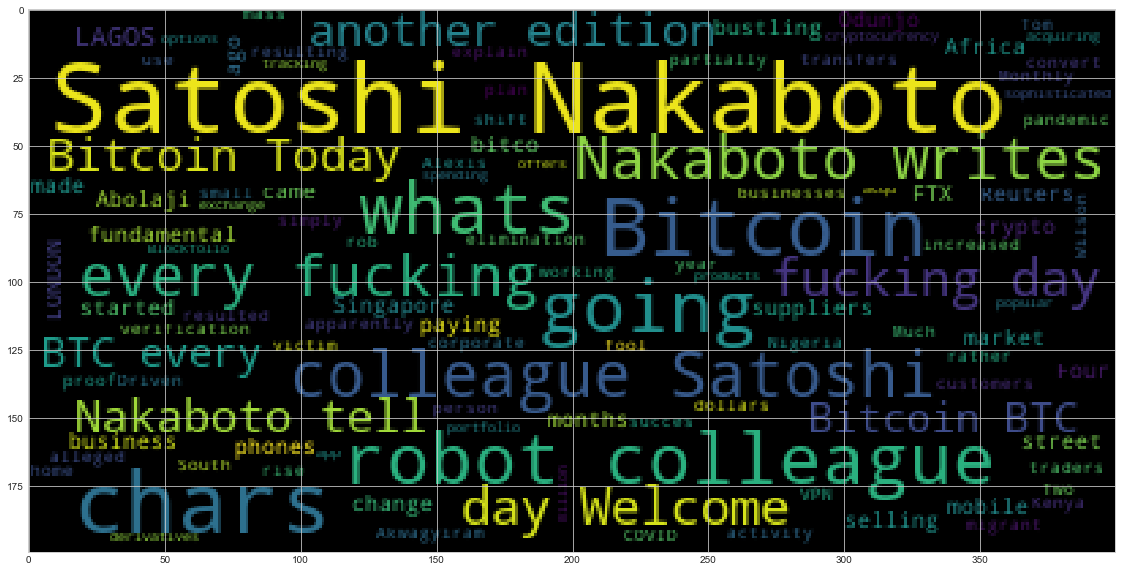

In [47]:
# Generate the Bitcoin word cloud
wc1 = WordCloud().generate(bitcoin_sentiment_df.Text.str.cat())
plt.imshow(wc1)

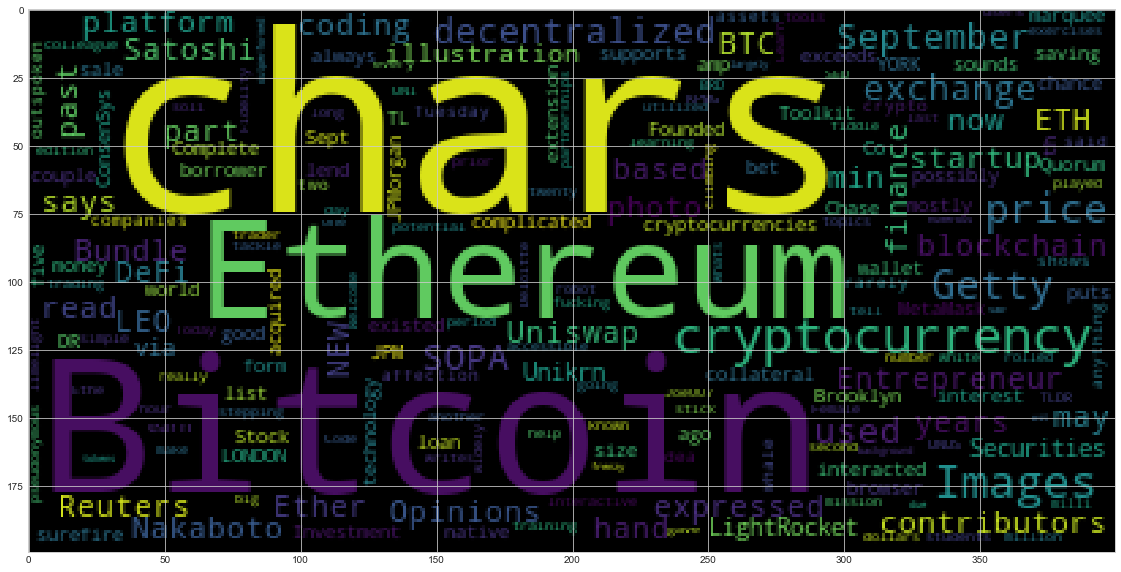

In [48]:
# Generate the Ethereum word cloud
wc1 = WordCloud().generate(Ethereum_sentiment_df.Text.str.cat())
plt.imshow(wc1)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [49]:
import spacy
from spacy import displacy

In [50]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [51]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [52]:
# Concatenate all of the bitcoin text together
def spacy_token_generator(text):
    great_string=''
    for x in text:
        cool_string=''.join(x)
        great_string=great_string + cool_string
    tokens=nlp(great_string)
    return tokens

In [53]:
# Run the NER processor on all of the text
bitcoin_spacy=spacy_token_generator(bitcoin_sentiment_df["Text"])

# Add a title to the document
bitcoin_spacy.user_data["title"]="Bitcoin NER"


In [54]:
# Render the visualization
displacy.render(bitcoin_spacy,style="ent")

In [55]:
# List all Entities
for ent in bitcoin_spacy.ents:
    print(ent.text,ent.label_)

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
VPN PRODUCT
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockfolio GPE
FTX ORG
$150 million MONEY
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
To

---

## Ethereum NER

In [56]:
# Concatenate all of the bitcoin text together
def spacy_token_generator(text):
    great_string=''
    for x in text:
        cool_string=''.join(x)
        great_string=great_string + cool_string
    tokens=nlp(great_string)
    return tokens

In [62]:
# Run the NER processor on all of the text
Eth_spacy=spacy_token_generator(Ethereum_sentiment_df["Text"])
# Add a title to the document
Eth_spacy.user_data["title"]="Ethereum NER"

In [63]:
# Render the visualization
displacy.render(Eth_spacy,style="ent")

In [64]:
# List all Entities
for ent in Eth_spacy.ents:
    print(ent.text,ent.label_)

the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
18, 2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
Reuters ORG
about 20% PERCENT
YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
chars]$100 million MONEY
Deloitte ORG
KPMG ORG
Fidelity ORG
$100 milli MONEY
Uniswap ORG
400 CARDINAL
UNI ORG
September 1 DATE
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
Ethereum ORG
Mateusz Slodkowski/ PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
chars]The Securities and Exchange Commission ORG
Unikrn ORG
Unikrn ORG
UnikoinGold ORG
16, 2020 DATE
6 min QUANTITY
the past few months DATE
wo